In [2]:
#######################################################          
# We'll built three regression models 
# to predict a song's "energy" levels.                    
#######################################################
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

music_df = pd.read_csv("music_clean.csv")
music_df = music_df.drop("Unnamed: 0", axis=1)

display(music_df.head(5))
print(music_df.shape)

#The music_df dataset has had dummy variables for "genre" added. 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


(1000, 12)


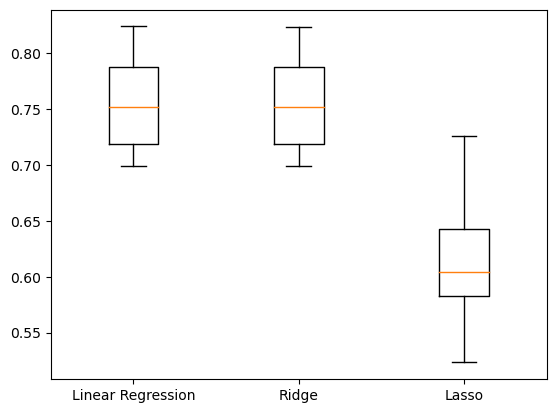

In [6]:
#############################################
# Visualizing regression model performance
#############################################

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Feature and target arrays are created, 
#and these are split into X_train, X_test, y_train, and y_test.
X = music_df.drop("energy",axis=1).values
y =  music_df["energy"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

#Lasso regression is not a good model for this problem, 
#while linear regression and ridge perform fairly equally. 
#Let's make predictions on the test set, and see if the RMSE can guide us on model selection.


In [9]:
#############################################
# Predicting performance on the test set
#############################################
# Linear regression and ridge appeared to produce similar results. 
# It would be appropriate to select either of those models; 
# however, we can check predictive performance on the test set 
# to see if either one can outperform the other.
#We'll use root mean squared error (RMSE) as the metric.

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge()}

for name, model in models.items():  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)  #False for RMSE or Yes for MSE
  print("{} Test Set RMSE: {}".format(name, test_rmse))

# The linear regression model just edges the best performance, 
# although the difference is a RMSE of 0.00001 for popularity! 
# Now let's look at classification model selection.


Linear Regression Test Set RMSE: 0.1018242478574712
Ridge Test Set RMSE: 0.10181038716585407


In [ ]:
###############################################
# Visualizing classification model performance
###############################################


